Enter the player's name: Anthony Davis
Statistics for Anthony Davis:

             PTS        AST        TRB        FG%        3P%        FT%
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000
mean   30.200000   2.800000  10.800000   0.572500   0.316700   0.797900
std     6.545567   1.032796   3.705851   0.112459   0.372332   0.115973
min    21.000000   1.000000   4.000000   0.375000   0.000000   0.500000
25%    23.750000   2.000000   9.000000   0.507250   0.000000   0.773250
50%    31.000000   3.000000  10.000000   0.557500   0.166500   0.816500
75%    35.750000   3.750000  13.750000   0.653000   0.625250   0.873000
max    38.000000   4.000000  16.000000   0.750000   1.000000   0.909000


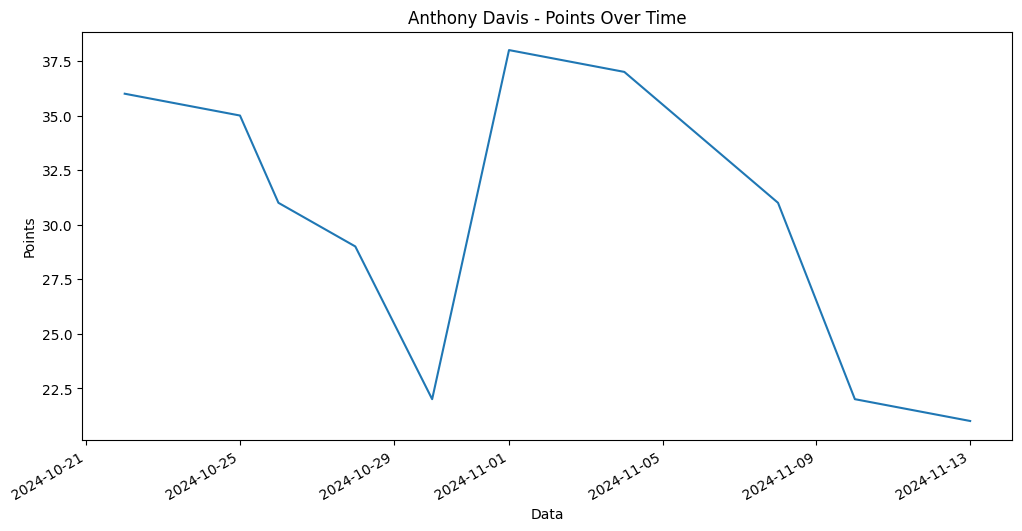


Model R^2 score for Anthony Davis's point prediction: -2.838601699273553
Predicted future points for Anthony Davis: 28.51


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/damonharrington/Downloads/nba_24_25.csv')

# Adding synthetic date if missing
if 'Data' not in df.columns:
    df['Data'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')

# Convert 'Data' to datetime format
df['Data'] = pd.to_datetime(df['Data'])

# Get player name input from the user
player_name = input("Enter the player's name: ")

# Filter data for the specific player
player_data = df[df['Player'] == player_name]

# Check if the player exists in the dataset
if player_data.empty:
    print(f"No data found for player: {player_name}")
else:
    # Display basic stats for the player
    print(f"Statistics for {player_name}:\n")
    print(player_data[['Data', 'PTS', 'AST', 'TRB', 'FG%', '3P%', 'FT%']].describe())

    # Plot the player's points over time
    player_data.set_index('Data')['PTS'].plot(title=f"{player_name} - Points Over Time", figsize=(12, 6))
    plt.ylabel("Points")
    plt.show()

    # Predict future points based on current stats
    # Define features and target variable
    X = player_data[['FGA', 'FG%', '3P', '3P%', 'FTA', 'FT%', 'AST', 'TRB', 'STL', 'BLK', 'TOV']]
    y = player_data['PTS']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Show model performance
    print(f"\nModel R^2 score for {player_name}'s point prediction:", model.score(X_test, y_test))

    # Make a future prediction (based on the average of recent stats)
    recent_stats = player_data[['FGA', 'FG%', '3P', '3P%', 'FTA', 'FT%', 'AST', 'TRB', 'STL', 'BLK', 'TOV']].mean()
    future_points_prediction = model.predict([recent_stats])[0]

    print(f"Predicted future points for {player_name}: {future_points_prediction:.2f}")


In [3]:

# Define the column name mappings
column_mappings = {
    'Name of the player': 'Player',
    'Abbreviation of the player\'s team': 'Tm',
    'Abbreviation of the opposing team': 'Opp',
    'Result of the game for the player\'s team': 'Res',
    'Minutes played': 'MP',
    'Field goals made': 'FG',
    'Field goal attempts': 'FGA',
    'Field goal percentage': 'FG%',
    '3-point field goals made': '3P',
    '3-point field goal attempts': '3PA',
    '3-point shooting percentage': '3P%',
    'Free throws made': 'FT',
    'Free throw attempts': 'FTA',
    'Free throw percentage': 'FT%',
    'Offensive rebounds': 'ORB',
    'Defensive rebounds': 'DRB',
    'Total rebounds': 'TRB',
    'Assists': 'AST',
    'Steals': 'STL',
    'Blocks': 'BLK',
    'Turnovers': 'TOV',
    'Personal fouls': 'PF',
    'Total points scored': 'PTS',
    'Game Score': 'GmSc',
    'Date of the game in YYYY-MM-DD format': 'Data'
}

# Rename columns in the dataframe
df.rename(columns=column_mappings, inplace=True)

# Verify column name changes
print("Updated Column Names:")
print(df.columns)


Updated Column Names:
Index(['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', 'Data'],
      dtype='object')


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/damonharrington/Downloads/nba_24_25.csv')

# Define the column name mappings
column_mappings = {
    'Player': 'Name of the player',
    'Tm': 'Abbreviation of the player\'s team',
    'Opp': 'Abbreviation of the opposing team',
    'Res': 'Result of the game for the player\'s team',
    'MP': 'Minutes played',
    'FG': 'Field goals made',
    'FGA': 'Field goal attempts',
    'FG%': 'Field goal percentage',
    '3P': '3-point field goals made',
    '3PA': '3-point field goal attempts',
    '3P%': '3-point shooting percentage',
    'FT': 'Free throws made',
    'FTA': 'Free throw attempts',
    'FT%': 'Free throw percentage',
    'ORB': 'Offensive rebounds',
    'DRB': 'Defensive rebounds',
    'TRB': 'Total rebounds',
    'AST': 'Assists',
    'STL': 'Steals',
    'BLK': 'Blocks',
    'TOV': 'Turnovers',
    'PF': 'Personal fouls',
    'PTS': 'Total points scored',
    'GmSc': 'Game Score',
    'Data': 'Date of the game in YYYY-MM-DD format'
}

# Rename columns in the dataframe
df.rename(columns=column_mappings, inplace=True)

# Verify column name changes
print("Updated Column Names:")
print(df.columns)


Updated Column Names:
Index(['Name of the player', 'Abbreviation of the player's team',
       'Abbreviation of the opposing team',
       'Result of the game for the player's team', 'Minutes played',
       'Field goals made', 'Field goal attempts', 'Field goal percentage',
       '3-point field goals made', '3-point field goal attempts',
       '3-point shooting percentage', 'Free throws made',
       'Free throw attempts', 'Free throw percentage', 'Offensive rebounds',
       'Defensive rebounds', 'Total rebounds', 'Assists', 'Steals', 'Blocks',
       'Turnovers', 'Personal fouls', 'Total points scored', 'Game Score',
       'Date of the game in YYYY-MM-DD format'],
      dtype='object')


Enter the player's name: KJ Martin


KeyError: 'Player'